Este notebook foi desenvolvido no curso 'Fundamentos de Linguagem Python Para Análise de Dados e Data Science' da Data Science Academy (DSA). Algumas alterações, comentários e complementos acerca do tema foram adicionados por mim.

In [ ]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste  Notebook:', python_version())

Versão da Linguagem Python Usada Neste  Notebook: 3.11.13


## Statistical Data Visualization com Seaborn

https://seaborn.pydata.org/

In [ ]:
!pip install -q seaborn

In [ ]:
# Imports
import random
import numpy as np
import pandas as pd
import matplotlib as mat
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
np.__version__

'2.0.2'

In [ ]:
pd.__version__

'2.2.2'

In [ ]:
mat.__version__

'3.10.0'

In [ ]:
import seaborn as sea
sea.__version__

'0.13.2'

## Criando Gráficos com Seaborn

In [ ]:
# Carregando um dos datasets que vem com o Seaborn
dados = sea.load_dataset("tips")

In [ ]:
dados.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


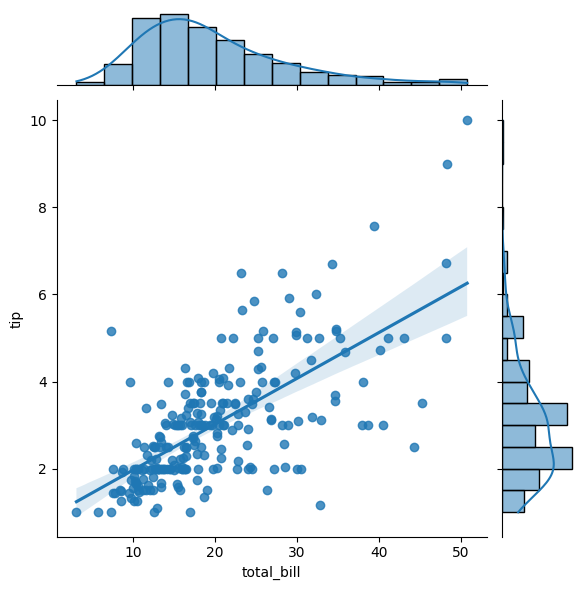

In [ ]:
# O método joinplot cria plot de 2 variáveis com gráficos bivariados e univariados
sea.jointplot(data = dados, x = "total_bill", y = "tip", kind = 'reg')

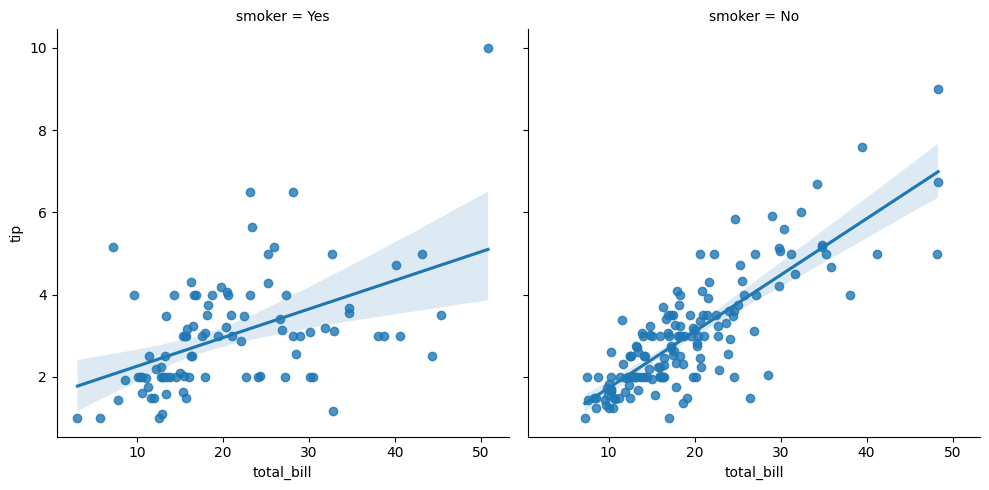

In [ ]:
# O método lmplot() cria plot com dados e modelos de regressão
sea.lmplot(data = dados, x = "total_bill", y = "tip", col = "smoker")

In [ ]:
# Construindo um dataframe com Pandas
df = pd.DataFrame()

In [ ]:
# Alimentando o Dataframe com valores aleatórios
df['idade'] = random.sample(range(20, 100), 30)
df['peso'] = random.sample(range(55, 150), 30)

In [ ]:
df.shape

(30, 2)

In [ ]:
df.head()

,idade,peso
0,68,133
1,76,128
2,78,123
3,39,96
4,32,90


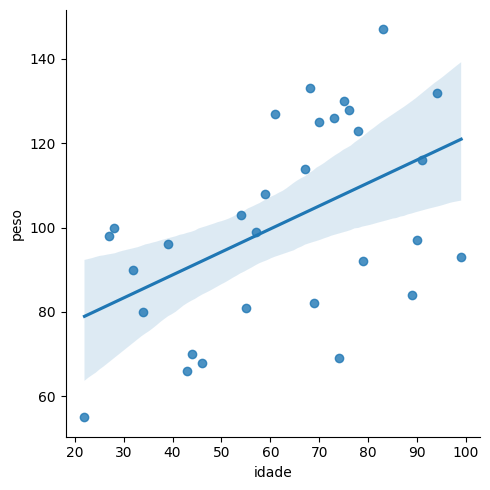

In [ ]:
# lmplot
sea.lmplot(data = df, x = "idade", y = "peso", fit_reg = True)
# fit_reg = crie um modelo de regressão (simples)

* Área sombreada - margem de erro, intervalo de confiança.

* Linha - debaixo para cima, indicando uma correlação positiva entre idade e peso, ou seja, aumenta a idade, aumenta o peso.

<Axes: xlabel='idade', ylabel='Density'>

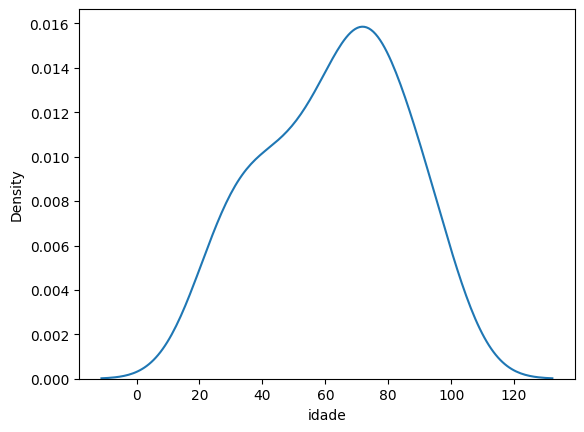

In [ ]:
# kdeplot
sea.kdeplot(df.idade)

# Densidade - distribuição de uma variável

<Axes: xlabel='peso', ylabel='Density'>

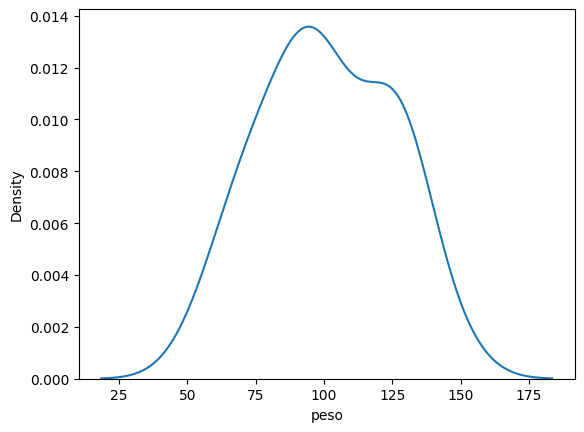

In [ ]:
# kdeplot
sea.kdeplot(df.peso)

<Axes: xlabel='peso', ylabel='Density'>

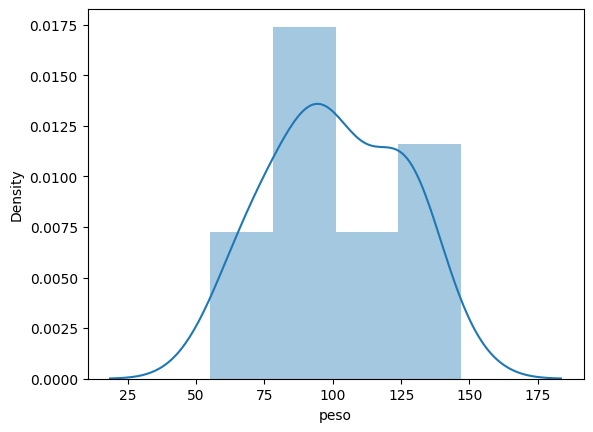

In [ ]:
# distplot
sea.distplot(df.peso)

# histograma + gráfico de densidade

<Axes: xlabel='idade'>

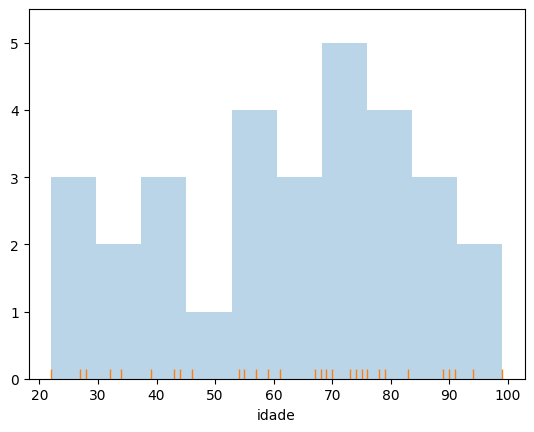

In [ ]:
# Histograma
plt.hist(df.idade, alpha = .3)
sea.rugplot(df.idade) # rugas...o valor das idades

<Axes: ylabel='idade'>

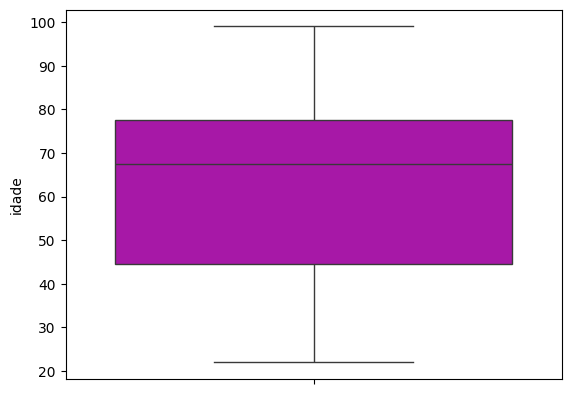

In [ ]:
# Box Plot
sea.boxplot(df.idade, color = 'm')

<Axes: ylabel='peso'>

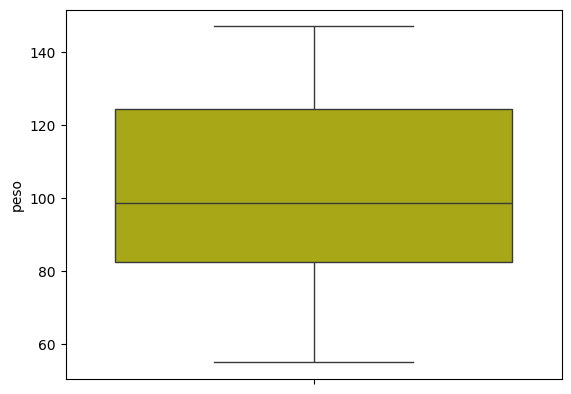

In [ ]:
# Box Plot
sea.boxplot(df.peso, color = 'y')

<Axes: ylabel='idade'>

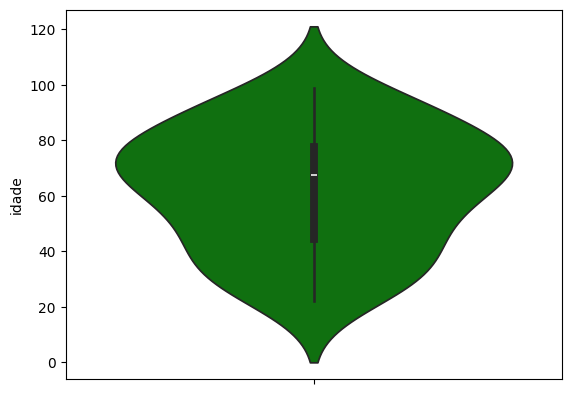

In [ ]:
# Violin Plot
sea.violinplot(df.idade, color = 'g')

<Axes: ylabel='peso'>

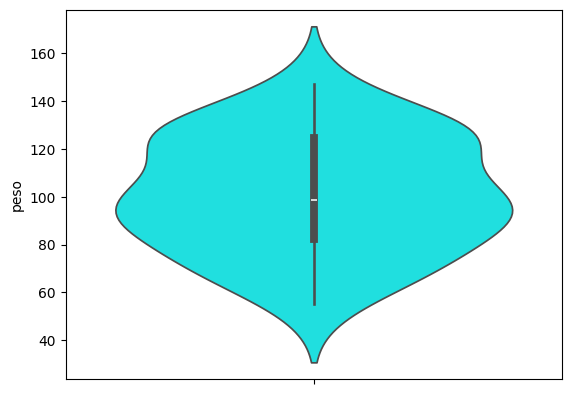

In [ ]:
# Violin Plot
sea.violinplot(df.peso, color = 'cyan')

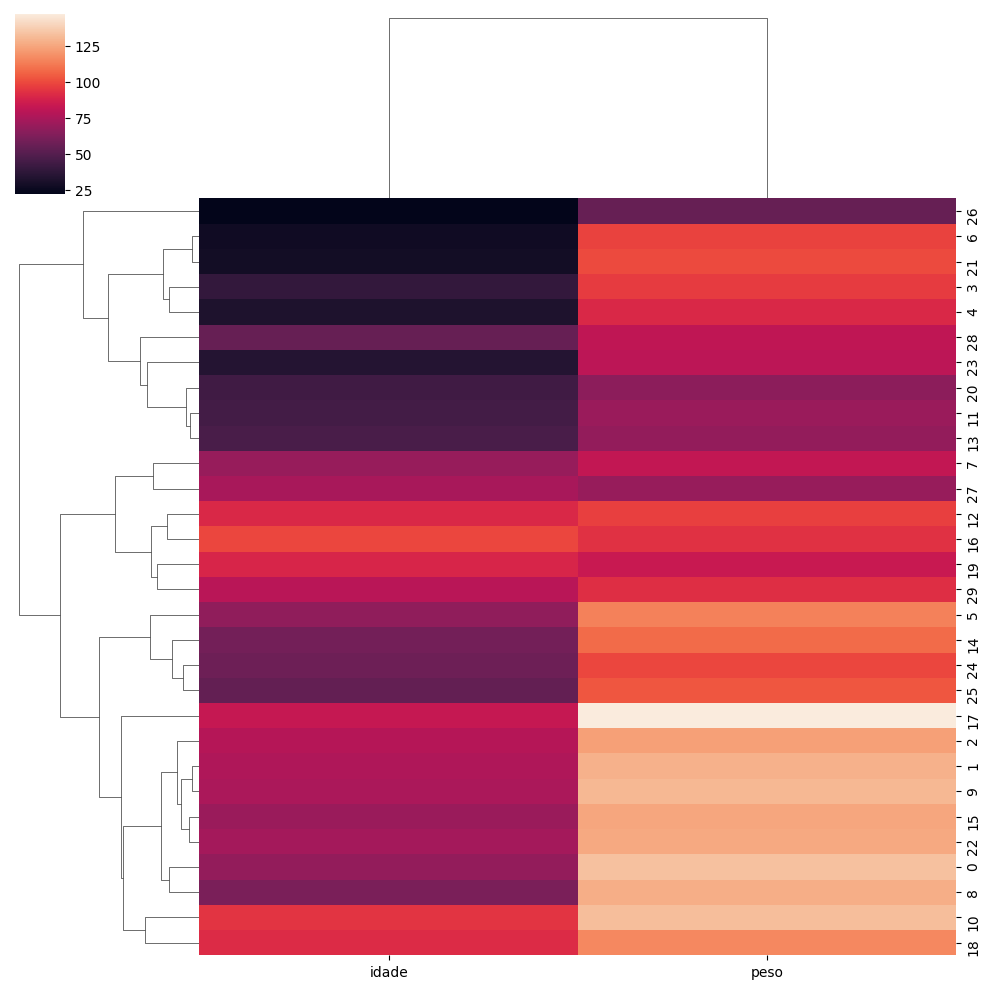

In [ ]:
# Clustermap
sea.clustermap(df)

## Usando Matplotlib, Seaborn, NumPy e Pandas na Criação de Gráfico Estatístico

In [ ]:
# Valores randômicos
np.random.seed(42)
n = 1000
pct_smokers = 0.2

# Variáveis
flag_fumante = np.random.rand(n) < pct_smokers
idade = np.random.normal(40, 10, n)
altura = np.random.normal(170, 10, n)
peso = np.random.normal(70, 10, n)

# Dataframe
dados = pd.DataFrame({'altura': altura, 'peso': peso, 'flag_fumante': flag_fumante})

# Cria os dados para a variável flag_fumante
dados['flag_fumante'] = dados['flag_fumante'].map({True: 'Fumante', False: 'Não Fumante'})

In [ ]:
dados.shape

(1000, 3)

In [ ]:
dados.head()

,altura,peso,flag_fumante
0,155.936825,78.745171,Não Fumante
1,169.168944,63.502348,Não Fumante
2,154.952796,57.967991,Não Fumante
3,177.600560,59.579556,Não Fumante
4,170.824398,65.127971,Fumante


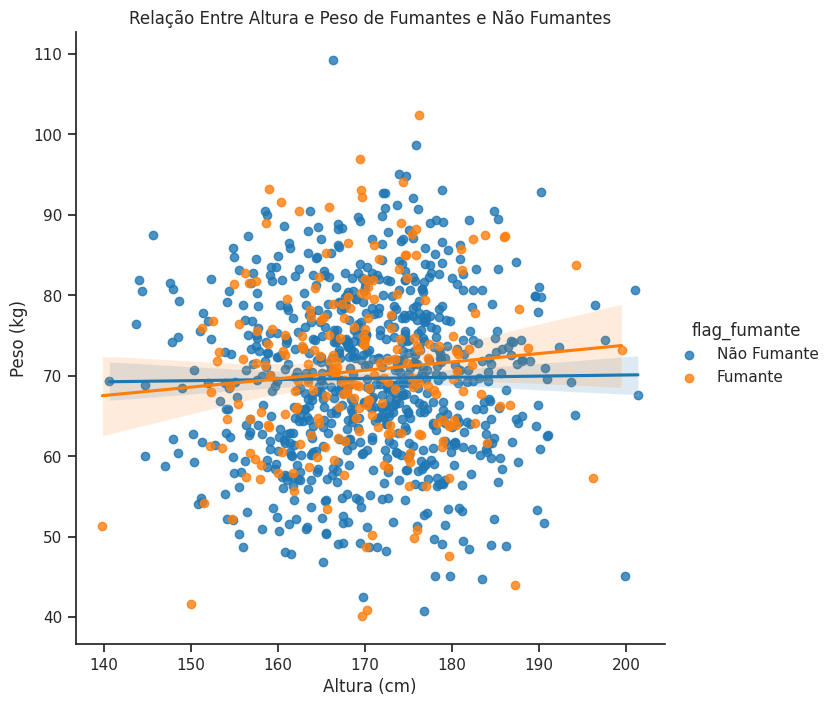

In [ ]:
# Style
sea.set(style = "ticks")

# lmplot
sea.lmplot(x = 'altura',
           y = 'peso',
           data = dados,
           hue = 'flag_fumante', # cores do gráfico
           palette = ['tab:blue', 'tab:orange'],
           height = 7)

# Labels e título
plt.xlabel('Altura (cm)')
plt.ylabel('Peso (kg)')
plt.title('Relação Entre Altura e Peso de Fumantes e Não Fumantes')

# Remove as bordas
sea.despine()

# Show
plt.show()